# Ukázka využití knihovny

## Vytvoření grafu

Pro vytvoření grafu importujeme `Graph` z knihovny `graphmanager`.

**Vrcholy** se přidávají metodou `add_vertex()`, která navíc přijímá parametry pro x a y souřadnice, nejlépe v intervalu $[0,1]$. Tyto souřadnice jsou důležité pouze pro grafické vykreslení a dají se změnit pomocí metody `move_vertex()`.

Graf samotný lze vypsat pomocí `print()`. Nyní je graf docela prázdný, a tak se vypíše pouze seznam vrcholů.

In [1]:
from graphmanager import Graph

g = Graph()

g.add_vertex(0.4, 0.55)
g.add_vertex(0.3, 0.25)
g.add_vertex(0.1, 0.3)
g.add_vertex(0.23, 0.5)

print(g)

Graph:
   0 - 0, {}
   1 - 0, {}
   2 - 0, {}
   3 - 0, {}



**Hrany** se přidávají i mění metodou `set_connection()`. Tato metoda potřebuje jako vstup indexy vrcholů, které chceme propojit, váhu hrany (defaultně 1) a také jestli chceme aby hrana šla na obě strany, nebo pouze v jednom směru (defaultně jednosměrná).

Hodnoty při vypisování pomocí print jsou ve tvaru `INDEX - STAV, {HRANY}`, přičemž hrany jsou ve tvaru `SOUSED: VÁHA`.

In [2]:
g.set_connection(1, 2, 1, bidirectional=True)
g.set_connection(2, 3, 4, bidirectional=True)
g.set_connection(3, 1, 1.5, False)
g.set_connection(0, 1, 3, False)

print(g)

Graph:
   0 - 0, {1: 3}
   1 - 0, {2: 1}
   2 - 0, {1: 1, 3: 4}
   3 - 0, {2: 4, 1: 1.5}



## Lepší vytváření grafu

Jelikož vytváření větších a komplexnějších grafů by zabralo moc práce, tak složka `modules` obsahuje pomocný soubor `graphconstructor.py`.

Tento soubor obsahuje 3 funkce pro rychlé vytvoření podgrafu ve tvaru cesty, cyklu nebo jako kompletní graf. Všechny funkce jako vstup berou graf `g`, počet nových vrcholů `n`, hodnotu `weight` pro nastavení váhy hran mezi novými vrcholy, a dále argumenty pro pozici podgrafu.

In [3]:
from modules.graphconstructor import add_path, add_cycle

add_cycle(g, 5, 2, 0.7, 0.3, 0.2)
add_path(g, 3, 1.2, 0.14, 0.75, 0.5, -0.1)

print(g)

Graph:
   0 - 0, {1: 3}
   1 - 0, {2: 1}
   2 - 0, {1: 1, 3: 4}
   3 - 0, {2: 4, 1: 1.5}
   4 - 0, {5: 2, 8: 2}
   5 - 0, {4: 2, 6: 2}
   6 - 0, {5: 2, 7: 2}
   7 - 0, {6: 2, 8: 2}
   8 - 0, {7: 2, 4: 2}
   9 - 0, {10: 1.2}
  10 - 0, {9: 1.2, 11: 1.2}
  11 - 0, {10: 1.2}



## Vykreslení grafu

Protože z výpisu vrcholů toho nejde příliš moc poznat, tak lze graf exportovat do svg souboru pomocí metody `export_svg()`.

Aby šel exportovaný obrázek vidět v jupyter notebooku, importujeme ještě `SVG`.

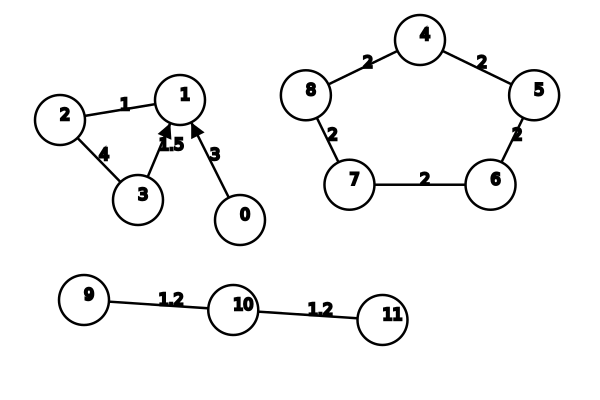

In [4]:
from IPython.display import SVG

g.export_svg("out.svg", width=600, height=400, show_vertex_ids=True, show_weights=True)

display(SVG(filename="out.svg"))

## Ukládání a načítání grafu

Graf lze uložit za pomoci metody `save_file()` a naopak načíst pomocí metody `load_file()`.

# This is an example saved graph
# Lines with '#' symbol at the beginning are considered comments

# Numbers after 'v' denote locations of all vertices
# All these values should be in range [0,1]
v
0.1 0.1
0.5 0.2
0.3 0.5
0.8 0.8

# Numbers after 'e' denote weights of edges
# The values for edges are in order FROM TO WEIGHT
e
0 1 8
0 2 1
1 0 8
1 3 2
2 1 3
2 3 6
3 1 2
3 2 7

# Loading graphs is done using Graph.load_file()

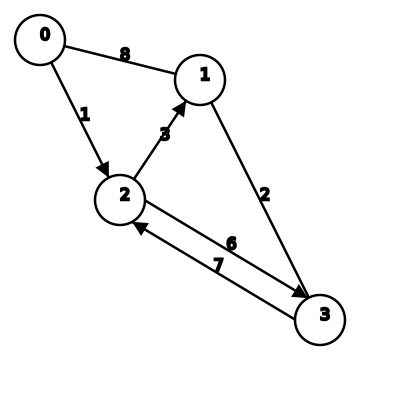

In [5]:
#show example in text form
%cat "./various/example.graph"

#load example
h = Graph()
h.load_file("./various/example.graph")
h.export_svg("out.svg", width=400, height=400, show_vertex_ids=True, show_weights=True)
display(SVG(filename="out.svg"))

In [6]:
#save graph and show file
g.save_file("saved.graph")
%cat "saved.graph"

# File generated by GraphManager

v
0.4 0.55
0.3 0.25
0.1 0.3
0.23 0.5
0.7 0.09999999999999998
0.8902113032590306 0.23819660112501048
0.8175570504584946 0.46180339887498945
0.5824429495415053 0.4618033988749895
0.5097886967409693 0.23819660112501057
0.14 0.75
0.38875104131950644 0.774958354161707
0.6375020826390129 0.7999167083234141

e
0 1 3
1 2 1
2 1 1
2 3 4
3 2 4
3 1 1.5
4 5 2
4 8 2
5 4 2
5 6 2
6 5 2
6 7 2
7 6 2
7 8 2
8 7 2
8 4 2
9 10 1.2
10 9 1.2
10 11 1.2
11 10 1.2


## TODO: algoritmy a ukazky :)